In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as keras
import tensorflow.keras.layers as layers
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
#Simulate two features and ground truth labels.
X = np.random.rand(500,2)
y = np.zeros((500,1))
y = ((X[:,0]<0.5)*(X[:,1]>=0.5)*1) + ((X[:,0]>=0.5)*(X[:,1]<0.5)*1)

# Leave this alone; we will come back to it later.
Z = ((X[:,0]-0.5)*(X[:,1]-0.5)).reshape(-1,1)
X_engineered = np.hstack([X, Z])

scatter = plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(handles=scatter.legend_elements()[0],title="Labels",labels=['False','True'])
plt.show()

NameError: name 'np' is not defined

Here is where we are going to fit our simple neural network, to try to accurately predict the outcome label.

Questions:

* What is the topology of the initial network? Describe it.
* Can we do better by adding another 'linear' layer?
* Can we do better by adding more nodes to our 'linear' layer?
* Can we do better by changing the activation function?


In [46]:
model = keras.Sequential([
      layers.Dense(units=1,activation="linear")
])

model.compile(optimizer="rmsprop",loss="mse",metrics=['mae'])

# Train on the engineered features
history = model.fit(X,y,epochs=10,batch_size=20,validation_split=0.2,verbose=True)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7793 - mae: 0.7176 - val_loss: 0.7905 - val_mae: 0.7117
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6968 - mae: 0.6587 - val_loss: 0.7350 - val_mae: 0.6748
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6590 - mae: 0.6254 - val_loss: 0.6841 - val_mae: 0.6417
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6021 - mae: 0.5910 - val_loss: 0.6367 - val_mae: 0.6103
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6636 - mae: 0.6479 - val_loss: 0.5951 - val_mae: 0.5841
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5627 - mae: 0.5751 - val_loss: 0.5536 - val_mae: 0.5599
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4887 - mae: 0.5341 - val_loss: 0.5159 - val_mae: 0.5408
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4966 - mae: 0.5552 - val_loss: 0.4833 - val_mae: 0.5305
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4143 - mae:

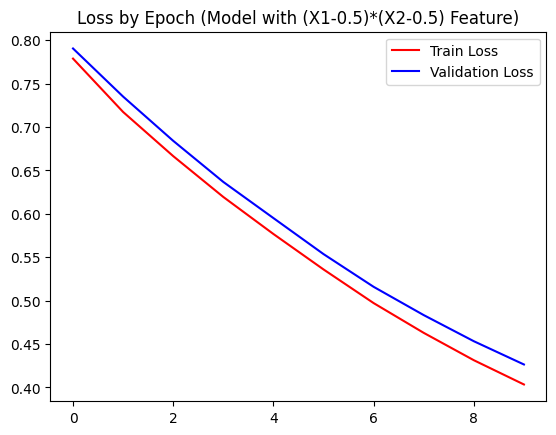

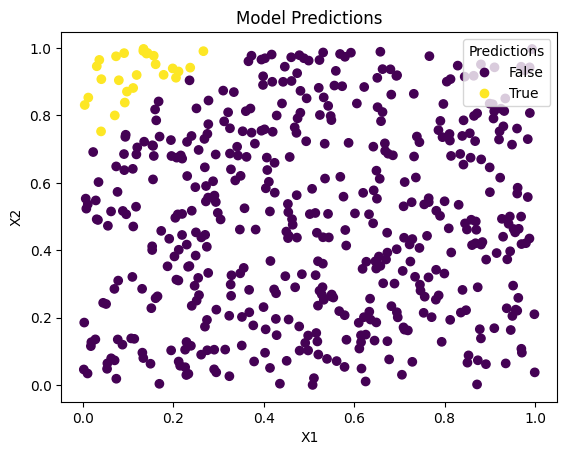

In [48]:
plt.plot(history.history['loss'],c="r")
plt.plot(history.history['val_loss'],c="b")
plt.legend(['Train Loss','Validation Loss'])
plt.title("Loss by Epoch (Model with (X1-0.5)*(X2-0.5) Feature)")
plt.show()

predictions = model(X)
scatter = plt.scatter(X[:,0],X[:,1],c=(predictions.numpy()>0.5))
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(handles=scatter.legend_elements()[0],title="Predictions",labels=['False','True'])
plt.title("Model Predictions")
plt.show()

In [49]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (20, 1)                │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5 (24.00 B)